In [ ]:

#Basic sklearn model syntax
from sklearn.module import Model
model=Model()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)

In [3]:
torch.cuda.is_available()

True

### K-nearest neighbors
- Predict the label of a data point by
    - Looking at the k cloestes labeled data points
    - Taking the majroirty vote

In [ ]:
#using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
churn_df=pd.read_csv('..\\data\\telecom_churn_clean.csv')
X=churn_df[['total_day_charge','total_eve_charge']].values
y=churn_df['churn'].values
print(X.shape,y.shape)



(3333, 2) (3333,)


In [15]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)


,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]]) # 3 new customer data points print(X_new.shape)
prediction=knn.predict(X_new)
print(prediction)

[0 1 1]


### Account_length and customer_service_calls

In [20]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
prediction = knn.predict(X_new)

print(prediction)

[0 1 0]


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21, stratify=y)

In [24]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)
print(knn.score(X_test, y_test))

[0 0 0 ... 0 0 0]
0.8536363636363636


{np.int64(1): 0.8508732646663681, np.int64(2): 0.8737124944021496, np.int64(3): 0.8759516345723243, np.int64(4): 0.8669950738916257, np.int64(5): 0.8687863860277654, np.int64(6): 0.8598298253470668, np.int64(7): 0.864755933721451, np.int64(8): 0.8589341692789969, np.int64(9): 0.8602776533811016, np.int64(10): 0.8549037169726825, np.int64(11): 0.8571428571428571, np.int64(12): 0.8566950291088222, np.int64(13): 0.8571428571428571, np.int64(14): 0.8575906851768921, np.int64(15): 0.8575906851768921, np.int64(16): 0.8566950291088222, np.int64(17): 0.8571428571428571, np.int64(18): 0.8549037169726825, np.int64(19): 0.8549037169726825, np.int64(20): 0.8549037169726825, np.int64(21): 0.8549037169726825, np.int64(22): 0.8549037169726825, np.int64(23): 0.8549037169726825, np.int64(24): 0.8549037169726825, np.int64(25): 0.8549037169726825}
{np.int64(1): 0.7681818181818182, np.int64(2): 0.8536363636363636, np.int64(3): 0.8336363636363636, np.int64(4): 0.86, np.int64(5): 0.8518181818181818, np.int6

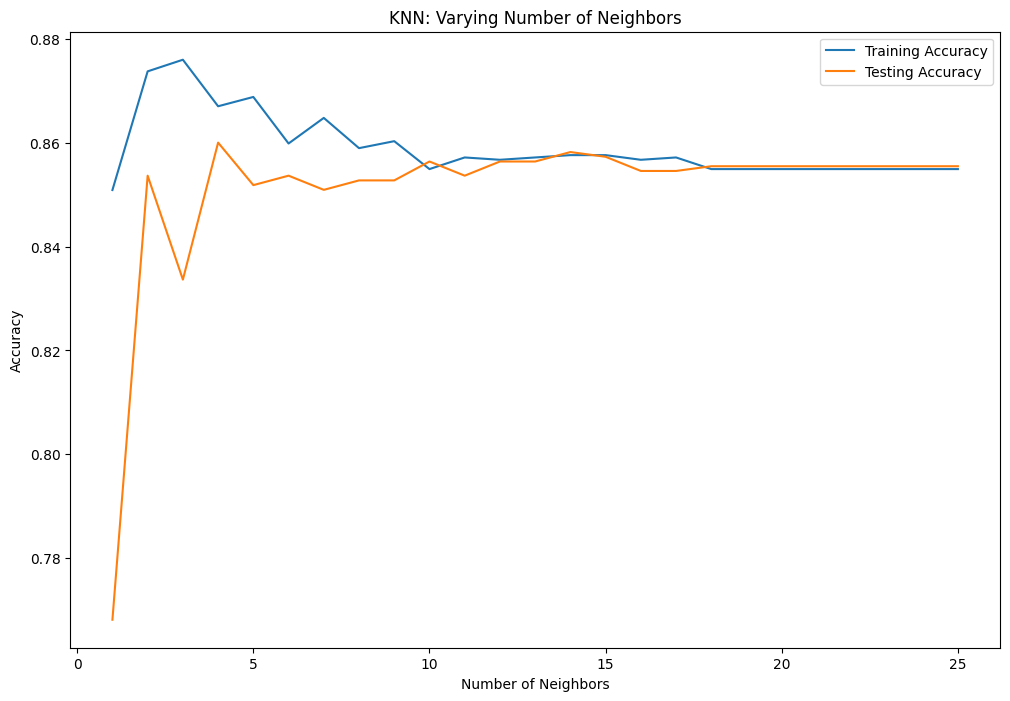

In [32]:
import matplotlib.pyplot as plt
train_accuracies={}
test_accuracies={}
neighbors = np.arange(1, 26)

for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)


print(train_accuracies)
print(test_accuracies)

plt.figure(figsize=(12,8))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors,train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors,test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()  
